In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
# The pd.read_csv function is used to load the dataset into the dataframe.
titanic_df = pd.read_csv('Datasets/titanictrain.csv')
#The below type function will give the type as titanic_df.
print(type(titanic_df)) 

<class 'pandas.core.frame.DataFrame'>


In [8]:
#The following is used for the preview of the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
#THe following is used for getting the information about various columns
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       886 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
# The describe function basically gives the count of each column, the mean for values, standard deviation etc.
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1. We have the drop function in pandas. The drop function basically is used to drop the rows or columns.
    axis = 0; This implies that the rows are to be dropped.
    axis = 1; This implies that the columns are to be dropped.
2. While dropping columns, the usual syntax comes out to be as:
    The drop_arr array is used to specify the columns we wanna drop.
    df.drop([drop_arr],axis=1,inplace=True)
3. While dropping rows, we have to drop rows based on certain value right, like if this value is there, drop the entire row.So, we specify the labels in an array or we set the index using the set_index function.
        data.set_index("Age") #Tell WHich column to look for
        data.drop(10,inplace=True,axis=0)
        


In [14]:
#The following is used to drop the columns.
columnsDrop = ['Name','PassengerId','Ticket']
titanic_df.drop(columnsDrop,inplace=True,axis=1)

In [16]:
titanic_df.drop(['Parch'],axis=1,inplace=True)

In [20]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    886 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [27]:
#THe dataset above tells that Age and Cabin and Embarked have Null values.
titanic_df.Embarked.isnull().sum() #This tells that 5 values are null.
titanic_df.Embarked.fillna("S",inplace=True)

#After, we filled the value, this gives as null.
titanic_df.Embarked.isnull().sum()


0

In [38]:
# This tells us or groups the according to the Sex and then calculates the mean and then sorts according to the 
# Survived values.
df = titanic_df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by="Survived",ascending=False)
df.head()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [42]:
#This is the function we write to perform on a class.
def get_Person(passenger):
    age,sex = passenger
    return 'Child' if age < 16 else sex
    

In [44]:
#We have the straight apply fnction which takes the argument as the function name and the axis.
titanic_df['Person']= titanic_df[['Age','Sex']].apply(get_Person,axis=1)

In [49]:
person_dummies_titanic = pd.get_dummies(titanic_df['Person'])
person_dummies_titanic.head()
person_dummies_titanic.columns = ['Child','Female','Male']
person_dummies_titanic.drop(['Male'],inplace=True,axis=1)

In [50]:
person_dummies_titanic.head() #We get whether a child or a female.
titanic_df = titanic_df.join(person_dummies_titanic) #This will join the two data frames.

,Child,Female
0,0,0
1,0,1
2,0,1
3,0,1
4,0,0


In [55]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Cabin,Embarked,Person,Child,Female
0,0,3,male,22.0,1,7.2500,NaN,S,male,0,0
1,1,1,female,38.0,1,71.2833,C85,C,female,0,1
2,1,3,female,26.0,0,7.9250,NaN,S,female,0,1
3,1,1,female,35.0,1,53.1000,C123,S,female,0,1
4,0,3,male,35.0,0,8.0500,NaN,S,male,0,0


[]

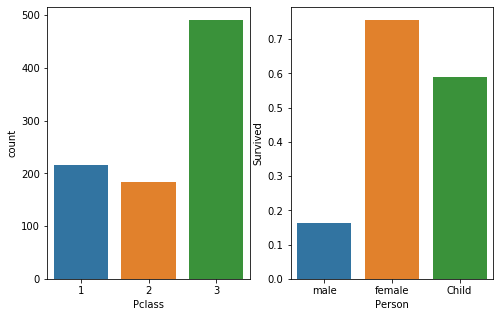

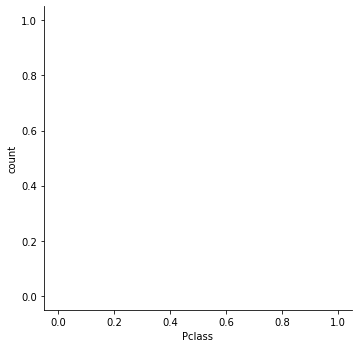

In [82]:
fig,(axis1,axis2) = plt.subplots(1,2,figsize=(8,5)) #This tells nrows and ncols
sns.factorplot('Pclass',data=titanic_df,kind='count',ax=axis1)
person_perc = titanic_df[['Person','Survived']].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person',y='Survived',data=person_perc,order=['male','female','Child'],ax=axis2)
plt.plot()

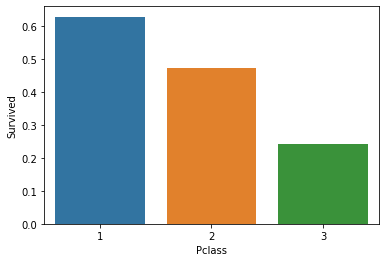

In [84]:
person_perc1 = titanic_df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean()
sns.barplot(x='Pclass',y='Survived',data=person_perc1)

[]

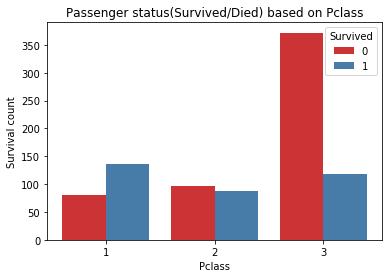

In [89]:
# 1. Passenger status based on gender. Status means survived/Died
ax = sns.countplot(x='Pclass',hue='Survived',palette='Set1',data=titanic_df)
ax.set(title='Passenger status(Survived/Died) based on Pclass',xlabel='Pclass',ylabel='Survival count')
plt.plot()

[]

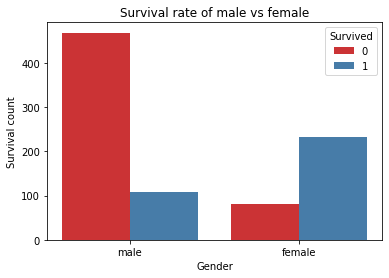

In [100]:
ax = sns.countplot(x='Sex',hue='Survived',data=titanic_df,palette='Set1')
ax.set(title="Survival rate of male vs female",xlabel='Gender',ylabel='Survival count')
plt.plot()

[]

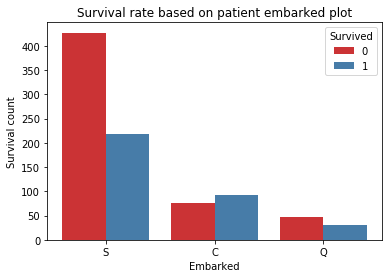

In [102]:
ax = sns.countplot(x='Embarked',hue='Survived',data=titanic_df,palette='Set1')
ax.set(title="Survival rate based on patient embarked plot",xlabel='Embarked',ylabel='Survival count')
plt.plot()

80.0


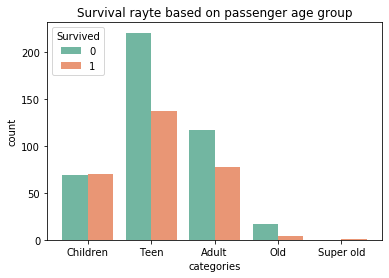

In [108]:
interval = (0,18,35,60,90,120)
categories = ['Children','Teen','Adult','Old','Super old']
# pd.cut() --> This is a direct function that we use to add the intervals or categories.
titanic_df['categories'] = pd.cut(titanic_df.Age,interval,labels=categories)
ax = sns.countplot(x='categories',hue='Survived',palette='Set2',data=titanic_df)
ax.set(title="Survival rayte based on passenger age group")
plt.plot()
print(titanic_df.Age.max())